In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 
import collections

In [2]:
df_unweighted = pd.read_csv('../combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('../combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
## Replace intermediary jurisdiction with officer base
jurisdiction_status_list = ['jurisdiction','officer_base','officer_jurisdiction']

In [5]:
df_weighted_jur = df_weighted[df_weighted['status'].isin(jurisdiction_status_list)]
df_jur = df_weighted_jur.drop(['weight','status'], axis = 1)
df_jur

,node_start,node_end
0,Hong Kong,Samoa
1,Hong Kong,Samoa
2,Hong Kong,Samoa
3,Hong Kong,Samoa
4,Hong Kong,Samoa
...,...,...
338119,Indonesia,British Virgin Islands
338120,Cook Islands,British Virgin Islands
338121,Hong Kong,British Virgin Islands
338122,Cook Islands,United Kingdom


In [6]:
df_jur_grouped = df_jur.groupby(['node_start','node_end'], as_index = False).size()
df_jur_grouped

,node_start,node_end,size
0,Albania,Bahamas,2
1,Algeria,British Virgin Islands,2
2,Algeria,United Kingdom,2
3,Algeria,United States,1
4,Andorra,Bahamas,26
...,...,...,...
2750,Zimbabwe,Hong Kong,3
2751,Zimbabwe,Jersey,1
2752,Zimbabwe,Panama,3
2753,Zimbabwe,Russia,2


### Convert Data to an Undirected Edge List

In [7]:
#df_jur_grouped_list = df_jur_grouped.values.tolist()
#df_jur_grouped_list

In [8]:
#d = collections.defaultdict(int)
#for n1, n2, v in df_jur_grouped_list:
#    d[min(n1, n2), max(n1, n2)] += v
#result = [[k[0], k[1], v] for k, v in d.items()]

In [9]:
#df_net = pd.DataFrame(result)
#df_net

In [10]:
#df_net = df_net.rename(columns = {0:'node_1', 1:'node_2', 2: 'weight'})
#df_net

In [11]:
#import df_net to csv later

In [12]:

g = ig.Graph.TupleList(df_jur_grouped.itertuples(index=False), directed=True, edge_attrs={'weight': "weight"})


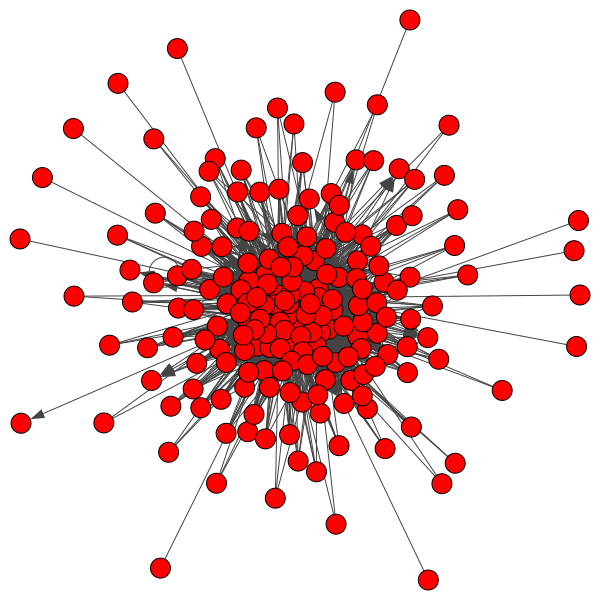

In [13]:
ig.plot(g)

In [14]:
g.diameter()

4

In [15]:
len(g.vs.indices)

195

In [16]:
#g.vs.indices
df_jur_grouped['node_start'].value_counts()

Hong Kong        58
Taiwan           53
China            52
Singapore        50
United States    49
                 ..
Sudan             1
Cameroon          1
Benin             1
Albania           1
Zambia            1
Name: node_start, Length: 189, dtype: int64

In [17]:
uni =df_jur_grouped['node_start'].unique()

In [18]:
len(uni)

189

In [19]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 8, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 9, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 10, {'name': 'Ireland'}),
 igraph.Vertex(<igraph.Graph object at 0x7fc5e5a34d60>, 11, {'name':

In [20]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
         #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'avg_betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [21]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'avg_weighted_betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [22]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,71.273196,0.01,4.0,-0.463328,14.149485,0.072935,1.959808
1,2,71.233161,0.01,4.0,-0.463670,14.176166,0.073452,1.959453
2,3,69.562500,0.02,4.0,-0.463227,14.223958,0.074083,1.949456
3,4,68.335079,0.02,4.0,-0.463776,14.225131,0.074477,1.945318
4,5,68.168421,0.03,4.0,-0.463716,14.284211,0.075180,1.943198


In [23]:
df_type1_unweighted.tail()

,nodes_removed,avg_betweenness,prop_removed,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.0,0.97,0.0,NaN,0.0,0.0,NaN
191,192,0.0,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.0,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.0,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.0,0.99,NaN,NaN,0.0,NaN,NaN


In [24]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,13.0,128.677022,-0.461188,1695.469072,0.072696,1.956959
1,2,0.01,13.0,127.693250,-0.461467,1700.585492,0.072029,1.959304
2,3,0.02,13.0,126.518705,-0.461109,1709.416667,0.072673,1.953667
3,4,0.02,13.0,125.075750,-0.463428,1716.340314,0.072503,1.953149
4,5,0.03,13.0,125.161663,-0.463183,1725.342105,0.073130,1.952374


In [25]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,avg_weighted_betweenness,assortativity_degree,avg_weighted_indegree,density,average_path_len
180,181,0.92,41.0,5.357143,-0.562860,1148.214286,0.158163,1.573770
181,182,0.93,41.0,5.461538,-0.551767,1236.230769,0.171598,1.571429
182,183,0.93,42.0,5.333333,-0.542218,1292.750000,0.173611,1.600000
183,184,0.94,42.0,5.818182,-0.542218,1410.272727,0.206612,1.600000
184,185,0.94,64.0,3.300000,-0.434520,1547.400000,0.220000,1.444444
185,186,0.95,88.0,2.111111,-0.485363,1475.555556,0.148148,1.708333
186,187,0.95,88.0,2.000000,-0.458171,1659.625000,0.171875,1.666667
187,188,0.96,88.0,1.857143,-0.421464,1896.142857,0.204082,1.611111
188,189,0.96,88.0,2.000000,-0.300000,1955.333333,0.194444,1.733333
189,190,0.97,11626.0,0.600000,NaN,2343.200000,0.200000,1.375000


### Targeted attack

In [26]:
##try sort by transitivity 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'transitivity':g.transitivity_local_undirected(mode='zero',weights='weight')})

In [27]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='transitivity',ascending=False)

In [28]:
temp_df.head(50)

,Node_indice,Nodes,transitivity
194,194,Zimbabwe,2.000000
106,106,French Polynesia,2.000000
133,133,Libya,2.000000
132,132,Lesotho,2.000000
130,130,Laos,2.000000
115,115,Honduras,2.000000
112,112,Guinea,2.000000
110,110,Guam,2.000000
30,30,Armenia,2.000000
107,107,Gabon,2.000000


In [29]:
temp_df.tail(50)

,Node_indice,Nodes,transitivity
41,41,Jersey,1.293679
36,36,Cook Islands,1.286987
47,47,Ukraine,1.259018
34,34,Austria,1.253436
51,51,Malta,1.248752
61,61,Turks and Caicos Islands,1.148810
53,53,Wyoming,1.141141
43,43,Netherlands,1.140330
35,35,Belize,1.133122
44,44,Singapore,1.129581


In [30]:
#extract out by Node
transitivity_of_del = temp_df['Nodes'].tolist()

In [31]:
#print the list to check it
transitivity_of_del

['Zimbabwe',
 'French Polynesia',
 'Libya',
 'Lesotho',
 'Laos',
 'Honduras',
 'Guinea',
 'Guam',
 'Armenia',
 'Gabon',
 'Djibouti',
 'Madagascar',
 'Cuba',
 'Chad',
 'Cambodia',
 'Brunei',
 'State of Delaware',
 'Botswana',
 'Bosnia and Herzegovina',
 'Bolivia',
 'Macedonia',
 'Bhutan',
 'Palestine',
 'Oman',
 'Syria',
 'Turkmenistan',
 'Senegal',
 'Puerto Rico',
 'Papua New Guinea',
 'Mongolia',
 'Nicaragua',
 'Tunisia',
 'Algeria',
 'Nauru',
 'Namibia',
 'Mozambique',
 'Morocco',
 'Angola',
 'Tajikistan',
 'Moldova',
 'Slovakia',
 'Bangladesh',
 'Nepal',
 'Dominica',
 'Sri Lanka',
 'Montenegro',
 'Saint Lucia',
 'Tanzania',
 'Azerbaijan',
 'Uzbekistan',
 'Iran',
 'Nigeria',
 'Finland',
 'Egypt',
 'Pakistan',
 'Dominican Republic',
 'Bulgaria',
 'Ghana',
 'Kyrgyzstan',
 'Turkey',
 'Malawi',
 'Jordan',
 'Norway',
 'Jamaica',
 'Bahrain',
 'Myanmar',
 'Iceland',
 'Kenya',
 'Vietnam',
 'Romania',
 'Tonga',
 'Saudi Arabia',
 'Congo',
 'Denmark',
 'Fiji',
 'Guatemala',
 'Kazakhstan',
 'Sie

In [32]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        #use strength
        deg = g.strength(mode='in')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_unweighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [33]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        g.delete_vertices(transitivity_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        between = g.betweenness(directed=True, weights='weight')
        between = sum(between)/max(len(between),1)
        bet.append(between)
        
        #use strength
        deg = g.strength(mode='in',weights='weight')
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(transitivity_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'avg_weighted_betweenness':bet,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_weighted_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [34]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
0,1,0.01,Zimbabwe,71.231959,4.0,-0.462565,14.170103,0.073042,1.959253
1,2,0.01,French Polynesia,71.181347,4.0,-0.461805,14.207254,0.073613,1.958755
2,3,0.02,Libya,71.062500,4.0,-0.460817,14.255208,0.074246,1.957339
3,4,0.02,Lesotho,70.905759,4.0,-0.461194,14.308901,0.074916,1.955414
4,5,0.03,Laos,70.805263,4.0,-0.460572,14.368421,0.075623,1.954249


In [35]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,avg_betweenness,diameter,assortativity_degree,avg_unweighted_indegree,density,average_path_len
190,191,0.97,Sudan,0.0,0.0,NaN,0.0,0.0,NaN
191,192,0.98,Norfolk Island,0.0,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Saint Martin (French part),0.0,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Sint Maarten (Dutch part),0.0,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Albania,0.0,NaN,NaN,0.0,NaN,NaN


In [36]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
0,1,0.01,Zimbabwe,130.093013,13.0,-0.462565,1696.149485,0.073042,1.959253
1,2,0.01,French Polynesia,129.981939,13.0,-0.461805,1704.782383,0.073613,1.958755
2,3,0.02,Libya,129.819192,13.0,-0.460817,1713.609375,0.074246,1.957339
3,4,0.02,Lesotho,129.707310,13.0,-0.461194,1722.560209,0.074916,1.955414
4,5,0.03,Laos,129.685155,13.0,-0.460572,1731.610526,0.075623,1.954249
5,6,0.03,Honduras,129.522404,13.0,-0.460198,1740.640212,0.076314,1.953070
6,7,0.04,Guinea,129.304139,13.0,-0.460998,1749.888298,0.077071,1.950660
7,8,0.04,Guam,129.118143,13.0,-0.460572,1759.235294,0.077840,1.948727
8,9,0.05,Armenia,129.163353,13.0,-0.459230,1768.602151,0.078477,1.948223
9,10,0.05,Gabon,128.951736,13.0,-0.458306,1778.135135,0.079240,1.946255


In [37]:
df_type2_weighted.tail(150)

,num_nodes_removed,prop_removed,node_removed,avg_weighted_betweenness,diameter,assortativity_degree,avg_weighted_indegree,density,average_path_len
45,46,0.23,Montenegro,122.003743,13.0,-0.431756,2201.557047,0.114409,1.889921
46,47,0.24,Saint Lucia,119.711398,13.0,-0.431822,2215.560811,0.115687,1.878378
47,48,0.24,Tanzania,119.795344,13.0,-0.430820,2230.510204,0.116896,1.877516
48,49,0.25,Azerbaijan,119.678006,13.0,-0.430255,2245.287671,0.117893,1.877118
49,50,0.26,Uzbekistan,119.530129,13.0,-0.429636,2260.337931,0.119049,1.876618
...,...,...,...,...,...,...,...,...,...
190,191,0.97,Sudan,0.000000,0.0,NaN,0.000000,0.000000,NaN
191,192,0.98,Norfolk Island,0.000000,0.0,NaN,0.000000,0.000000,NaN
192,193,0.98,Saint Martin (French part),0.000000,0.0,NaN,0.000000,0.000000,NaN
193,194,0.99,Sint Maarten (Dutch part),0.000000,0.0,NaN,0.000000,0.000000,NaN


#### Unweighted

In [38]:
## Commented out to not confuse; use the weighted one below

#Try plotting unweighted
#fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
#ax2_1 = ax[0].twinx()
#ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
#ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 100)
#ax[0].set_ylim([0,12])
#ax[0].plot('prop_removed','avg_betweenness',data=df_type1_unweighted,ls='--',color='darkgreen')
#ax2_1.plot('prop_removed','avg_unweighted_indegree',data=df_type1_unweighted,ls='--',color='darkred')
#ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
#ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
#ax[0].legend(loc='upper right')
#ax[0].set_xlabel('Proportion of nodes removed')
#ax[0].set_title('Random deletion')
#ax2_1.tick_params('y',colors='darkred')
#ax2_1.set_ylabel('Avg inDegree')
#ax2_1.legend(loc='upper left')

#ax2_2 = ax[1].twinx()
#ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
#ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
#ax[1].plot('prop_removed','avg_betweenness',data=df_type2_unweighted,ls='--',color='green')
#ax2_2.plot('prop_removed','avg_unweighted_indegree',data=df_type2_unweighted,ls='--',color='red')
#ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
#ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
#ax[1].legend(loc='upper right')
#ax[1].set_xlabel('Proportion of nodes removed')
#ax[1].set_title('Targeted deletion')
#ax2_2.tick_params('y',colors='darkred')
#ax2_2.set_ylabel('Avg inDegree')
#ax2_2.legend(loc='upper left')
#plt.show()

#### Weighted

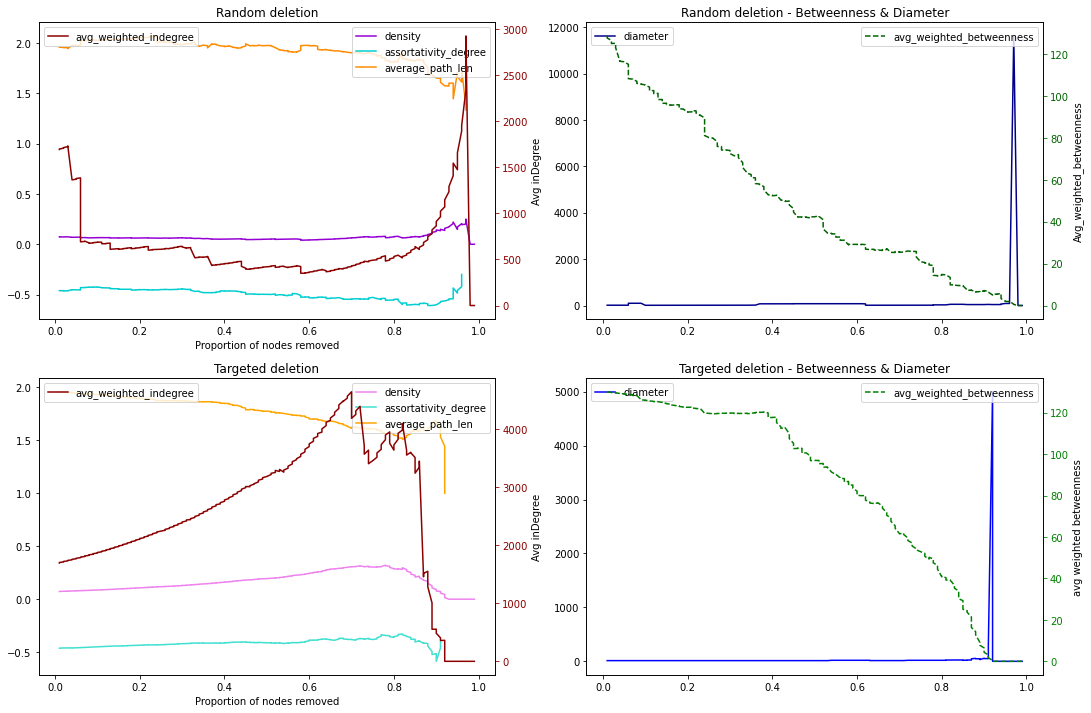

In [39]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(2,2,figsize=(18,12),sharey=False)

#Random attack LHS graphs

ax[0,1].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
ax[0,0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax[0,0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0,0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0,0].legend(loc='upper right')
ax[0,0].set_xlabel('Proportion of nodes removed')
ax[0,0].set_title('Random deletion')

ax2_1 = ax[0,0].twinx()
ax2_1.plot('prop_removed','avg_weighted_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

#Random attack RHS Graphs - Betweenness & Diameter
ax[0,1].set_title('Random deletion - Betweenness & Diameter')
ax[0,1].legend(loc='upper left')

ax_bet_rand = ax[0,1].twinx()
ax_bet_rand.plot('prop_removed','avg_weighted_betweenness',data=df_type1_weighted,ls='--',color='darkgreen')
ax_bet_rand.tick_params('y',colors='darkgreen')
ax_bet_rand.set_ylabel('Avg_weighted_betweenness')
ax_bet_rand.legend(loc='upper right')


#Targeted attack LHS Graphs

ax[1,1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1,0].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax[1,0].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1,0].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1,0].legend(loc='upper right')
ax[1,0].set_xlabel('Proportion of nodes removed')
ax[1,0].set_title('Targeted deletion')

ax2_2 = ax[1,0].twinx()
ax2_2.plot('prop_removed','avg_weighted_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
ax2_2.tick_params('y',colors='darkred')


#Targeted attack RHS Graphs - Betweenness & Diameter 

ax[1,1].set_title('Targeted deletion - Betweenness & Diameter')
ax[1,1].legend(loc='upper left')

ax_bet_tar = ax[1,1].twinx()
ax_bet_tar.plot('prop_removed','avg_weighted_betweenness',data=df_type2_weighted,ls='--',color='green')
ax_bet_tar.tick_params('y',colors='green')
ax_bet_tar.set_ylabel('avg weighted betweenness')
ax_bet_tar.legend(loc='upper right')
plt.show()